In [1]:
# Dependencies
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [2]:
# Twitter Credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
# Twitter API Keys
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

In [5]:

#Get tweets from each news organization's twitter feeds.

sentiments = []

target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes")

#Loop though target users.

for user in target_users:
    
  

    counter = 0
    
    
#Get all tweets from the homefeed of each news organization.

    public_tweets = api.user_timeline(user, count = 100)

    

    for tweet in public_tweets:

      

        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        tweet_text = tweet["text"]

        #Add sentiments for each tweet to the sentiments list.

        sentiments.append({"User" : user,
                           "Date": tweet["created_at"],
                           "Compound" : compound,
                           "Positive" : pos,
                           "Negative" : neg,
                           "Neutral" : neu,
                           "Tweets Ago" : counter,
                           "Tweet Text" : tweet_text})
    

        counter = counter + 1



In [6]:
news_tweet = pd.DataFrame.from_dict(sentiments)
news_tweet
news_tweet.to_csv

<bound method DataFrame.to_csv of      Compound                            Date  Negative  Neutral  Positive  \
0     -0.7579  Wed Jul 18 19:56:03 +0000 2018     0.255    0.745     0.000   
1      0.0000  Wed Jul 18 18:02:07 +0000 2018     0.000    1.000     0.000   
2      0.0000  Wed Jul 18 17:02:01 +0000 2018     0.000    1.000     0.000   
3      0.0000  Wed Jul 18 16:00:26 +0000 2018     0.000    1.000     0.000   
4      0.4588  Wed Jul 18 14:37:12 +0000 2018     0.051    0.812     0.137   
5      0.7906  Wed Jul 18 14:00:12 +0000 2018     0.086    0.602     0.312   
6      0.4404  Wed Jul 18 13:03:04 +0000 2018     0.000    0.873     0.127   
7      0.7906  Wed Jul 18 12:03:02 +0000 2018     0.000    0.682     0.318   
8      0.8625  Wed Jul 18 11:00:16 +0000 2018     0.057    0.600     0.343   
9      0.0000  Wed Jul 18 09:19:41 +0000 2018     0.000    1.000     0.000   
10     0.3400  Wed Jul 18 08:00:19 +0000 2018     0.000    0.821     0.179   
11    -0.5267  Wed Jul 18 07:2

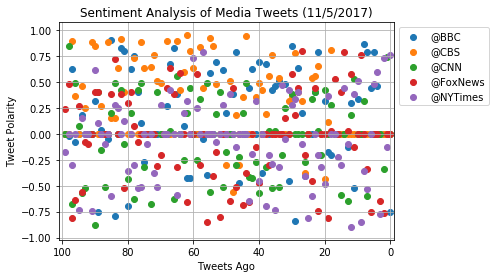

In [7]:
#Plot scatterplot graph.

plt.xlim(101, -1)

for user in target_users:
    dataframe = news_tweet.loc[news_tweet["User"] == user]
    plt.scatter(dataframe["Tweets Ago"],dataframe["Compound"],label = user)
    
#Add legend
plt.legend(bbox_to_anchor = (1,1))

#Add title, x axis label, and y axis label.
plt.title("Sentiment Analysis of Media Tweets (11/5/2017)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

#Set a grid on the plot.
plt.grid()

plt.savefig("Analysis of Media Tweets")
plt.show()

In [8]:
average_sentiment = news_tweet.groupby("User")["Compound"].mean()
average_sentiment

User
@BBC        0.141922
@CBS        0.286540
@CNN       -0.025602
@FoxNews   -0.026469
@NYTimes   -0.051663
Name: Compound, dtype: float64

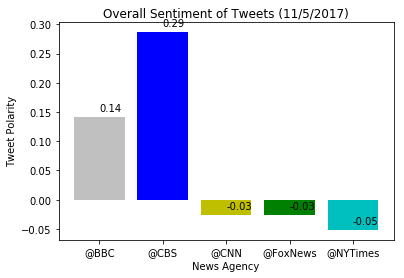

In [11]:
x_axis = np.arange(len(average_sentiment))
xlabels = average_sentiment.index
count = 0
for sentiment in average_sentiment:
    plt.text(count, sentiment+.01, str(round(sentiment,2)))
    count = count + 1
plt.bar(x_axis, average_sentiment, tick_label = xlabels, color = ['silver', 'b', 'y', 'g', 'c'])

plt.title("Overall Sentiment of Tweets (11/5/2017)")
plt.xlabel("News Agency")
plt.ylabel("Tweet Polarity")
plt.savefig("Overall Sentiment of Tweets")
plt.show()